<a href="https://colab.research.google.com/github/JotaPMendes/JotaPMendes/blob/main/faculdade_cdia_2023_2026/6_semestre/consultoria_ciencia_dados/modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística / Linear - Aplicada a Base Anonimizada

Objetivos: Mensurar quais agrupamentos trazem mais insights acerca da quantidade de alunos proprícios a não conclusão / abandono do curso.
Afim de mensurar um dos iniciais problemas no processo de ensino, seria o enfase no estudo acerca da evasão dos alunos. Tornando assim, medidas posteriores para melhoria de outras váriveis do processo, como notas, classe, status do aluno.

***Pontos Norteadores do Projeto:***

Visão Geral:

Dados_Modelo - Considera apenas as colunas necessárias para a modelagem.

Nome_coluna_y / Status - 'recomendacao_conselho_aprovado_slash_reprovado' → usada para criar a variável alvo (abandono ou não), pois serve para análise descritiva.



Variáveis Preditoras Consideradas como:

---



Features (X) → Engloba varáveis relacionada a notas, presença, comportamento.

* ['media_provas','nota_final','pre_class_percent''presence_percent','homework_percent''class_participation_percent','behavior_percent''nota__1','nota__2']

Variáveis Resposta Consideradas como:

**features_Y** =

* abandono_list = ['evadiu', 'desistiu', 'trancou matrícula']

**Status** =
 y_status = dado original, usado para criar y_abandono e para análises.

Escopo da Modelagem Usada para Regressão:

---



y_status: coluna original com status do aluno (ex.: 'Aprovado', 'Reprovado', 'evadiu', etc.)

y_abandono: variável alvo binária criada a partir de y_status:
1 → aluno abandonou (status está em ['evadiu', 'desistiu', 'trancou matrícula'])
0 → aluno não abandonou (qualquer outro status)

*Objetivo*:
- y_status é usado para análise descritiva.
- y_abandono é usado para treinar modelos de classificação binária (ex.: regressão logística).
- Features X: conjunto de variáveis independentes (notas, presença, comportamento) usadas para prever y_abandono.

***Imports Ultilizados:***

In [ ]:
!pip install tensorflow
!pip install tensorflow-probability

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, classification_report


In [ ]:
dados = pd.read_excel('/content/base_final_final_ 1.xlsx')
#Exibe as cinco primeiras linhas
dados.head()

,base_tratada_final,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113
0,nome_planilha_feedback,sala,num,nome_completo,aula_1_8_fev_2025_pre_class,aula_1_8_fev_2025_p,aula_1_8_fev_2025_hw,aula_1_8_fev_2025_cp,aula_1_8_fev_2025_bh,aula_2_15_fev_2025_pre_class,...,behavior_positive,behavior_percent,data_do_ultimo_login_conta_cpm,status_da_conta_cpm,quantidade_de_reprovacoes_no_curso_4_reprovaco...,status_aluno_semestre_anterior,aluno_pode_trancar_matricula_ou_manter_trancam...,situacao_aluno_no_semestre,motivo_nao_frequentando,recomendacao_conselho_aprovado_slash_reprovado
1,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,1,Estudante 1 - Campinas Four Corners A1,0,1,0,2,0,1,...,13,1,2025-12-07 14:38:03,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
2,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,2,Estudante 2 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1,2025-05-22 14:42:09,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
3,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,3,Estudante 3 - Campinas Four Corners A1,0,1,0,2,0,1,...,12,1,2025-06-06 21:55:13,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
4,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,4,Estudante 4 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1,2025-06-13 11:40:05,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado


In [ ]:
# Manda o  Pandas para usar a segunda linha (índice 1) como cabeçalho
dados = pd.read_excel('/content/base_final_final_ 1.xlsx', header=1)

dados.head()

,nome_planilha_feedback,sala,num,nome_completo,aula_1_8_fev_2025_pre_class,aula_1_8_fev_2025_p,aula_1_8_fev_2025_hw,aula_1_8_fev_2025_cp,aula_1_8_fev_2025_bh,aula_2_15_fev_2025_pre_class,...,behavior_positive,behavior_percent,data_do_ultimo_login_conta_cpm,status_da_conta_cpm,quantidade_de_reprovacoes_no_curso_4_reprovacoes_perda_de_vaga,status_aluno_semestre_anterior,aluno_pode_trancar_matricula_ou_manter_trancamento_alunos_com_status_nao_ja_fizeram_trancamento_no_passado,situacao_aluno_no_semestre,motivo_nao_frequentando,recomendacao_conselho_aprovado_slash_reprovado
0,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,1,Estudante 1 - Campinas Four Corners A1,0,1,0,2,0,1,...,13,1.0,2025-12-07 14:38:03,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
1,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,2,Estudante 2 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1.0,2025-05-22 14:42:09,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
2,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,3,Estudante 3 - Campinas Four Corners A1,0,1,0,2,0,1,...,12,1.0,2025-06-06 21:55:13,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
3,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,4,Estudante 4 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1.0,2025-06-13 11:40:05,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado
4,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,5,Estudante 5 - Campinas Four Corners A1,0,1,0,2,0,1,...,11,1.0,2025-05-30 20:47:43,Ativa,0.0,Aluno Novo,Sim,NaN,NaN,Aprovado


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Columns: 114 entries, nome_planilha_feedback to recomendacao_conselho_aprovado_slash_reprovado
dtypes: float64(17), int64(87), object(10)
memory usage: 1.7+ MB


In [ ]:
dados.describe()

,num,aula_1_8_fev_2025_pre_class,aula_1_8_fev_2025_p,aula_1_8_fev_2025_hw,aula_1_8_fev_2025_cp,aula_1_8_fev_2025_bh,aula_2_15_fev_2025_pre_class,aula_2_15_fev_2025_p,aula_2_15_fev_2025_hw,aula_2_15_fev_2025_cp,...,class_participation_positive,class_participation_neutral,class_participation_negative,class_participation_total,class_participation_percent,behavior_negative,behavior_mediano,behavior_positive,behavior_percent,quantidade_de_reprovacoes_no_curso_4_reprovacoes_perda_de_vaga
count,1977.000000,1977.0,1977.000000,1977.0,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,...,1977.000000,1977.000000,1977.000000,1977.000000,1976.000000,1977.000000,1977.00000,1977.000000,1977.000000,1977.000000
mean,9.077390,0.0,0.751644,0.0,1.078402,0.001012,0.709661,0.785028,0.953465,1.225089,...,7.773900,0.839150,0.143652,8.756702,0.687150,0.001517,0.00607,9.592817,0.952049,-136.250885
std,5.559449,0.0,0.432169,0.0,1.353293,0.031798,0.454034,0.410907,0.210694,1.255118,...,3.519173,1.495751,0.555249,3.461908,0.272778,0.038935,0.11004,3.622580,0.212862,1160.840355
min,1.000000,0.0,0.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-9999.000000
25%,4.000000,0.0,1.000000,0.0,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,8.000000,0.597727,0.000000,0.00000,9.000000,1.000000,0.000000
50%,8.000000,0.0,1.000000,0.0,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,9.000000,0.000000,0.000000,10.000000,0.769231,0.000000,0.00000,11.000000,1.000000,0.000000
75%,13.000000,0.0,1.000000,0.0,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,1.000000,0.000000,11.000000,0.875000,0.000000,0.00000,12.000000,1.000000,0.000000
max,28.000000,0.0,1.000000,0.0,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,13.000000,11.000000,7.000000,13.000000,1.000000,1.000000,4.00000,13.000000,1.000000,5.000000


In [ ]:
dados.columns.values.tolist()

['nome_planilha_feedback',
 'sala',
 'num',
 'nome_completo',
 'aula_1_8_fev_2025_pre_class',
 'aula_1_8_fev_2025_p',
 'aula_1_8_fev_2025_hw',
 'aula_1_8_fev_2025_cp',
 'aula_1_8_fev_2025_bh',
 'aula_2_15_fev_2025_pre_class',
 'aula_2_15_fev_2025_p',
 'aula_2_15_fev_2025_hw',
 'aula_2_15_fev_2025_cp',
 'aula_2_15_fev_2025_bh',
 'aula_3_22_fev_2025_pre_class',
 'aula_3_22_fev_2025_p',
 'aula_3_22_fev_2025_hw',
 'aula_3_22_fev_2025_cp',
 'aula_3_22_fev_2025_bh',
 'aula_4_8_mar_2025_pre_class',
 'aula_4_8_mar_2025_p',
 'aula_4_8_mar_2025_hw',
 'aula_4_8_mar_2025_cp',
 'aula_4_8_mar_2025_bh',
 'aula_5_15_mar_2025_pre_class',
 'aula_5_15_mar_2025_p',
 'aula_5_15_mar_2025_hw',
 'aula_5_15_mar_2025_cp',
 'aula_5_15_mar_2025_bh',
 'aula_6_29_mar_2025_pre_class',
 'aula_6_29_mar_2025_p',
 'aula_6_29_mar_2025_hw',
 'aula_6_29_mar_2025_cp',
 'aula_6_29_mar_2025_bh',
 'aula_7_5_abr_2025_pre_class',
 'aula_7_5_abr_2025_p',
 'aula_7_5_abr_2025_hw',
 'aula_7_5_abr_2025_cp',
 'aula_7_5_abr_2025_bh',
 

In [ ]:

nome_coluna_y = 'recomendacao_conselho_aprovado_slash_reprovado'

valores_unicos = dados[nome_coluna_y].unique()
print(f"Valores únicos na coluna '{nome_coluna_y}':")
print(valores_unicos)

Valores únicos na coluna 'recomendacao_conselho_aprovado_slash_reprovado':
['Aprovado' 'evadiu' 'mudou de turma' 'Aprovado por Conselho' 'Reprovado'
 'desistiu' 'Reprovado por Conselho' 'trancou matrícula' 'suspenso']


# Normalização dos Dados e Recorte Com Dados Necessários

Normalização / Padronização dos dados

In [ ]:
# 1. Instanciar o normalizador
normalizador = StandardScaler()

# 2. Identificar as colunas numéricas automaticamente
numeric_cols = dados.select_dtypes(include=['number']).columns

# 3. Aplicar o fit_transform APENAS nessas colunas numéricas
dados[numeric_cols] = normalizador.fit_transform(dados[numeric_cols])


In [ ]:
dados.head()

,nome_planilha_feedback,sala,num,nome_completo,aula_1_8_fev_2025_pre_class,aula_1_8_fev_2025_p,aula_1_8_fev_2025_hw,aula_1_8_fev_2025_cp,aula_1_8_fev_2025_bh,aula_2_15_fev_2025_pre_class,...,behavior_positive,behavior_percent,data_do_ultimo_login_conta_cpm,status_da_conta_cpm,quantidade_de_reprovacoes_no_curso_4_reprovacoes_perda_de_vaga,status_aluno_semestre_anterior,aluno_pode_trancar_matricula_ou_manter_trancamento_alunos_com_status_nao_ja_fizeram_trancamento_no_passado,situacao_aluno_no_semestre,motivo_nao_frequentando,recomendacao_conselho_aprovado_slash_reprovado
0,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,-1.453280,Estudante 1 - Campinas Four Corners A1,0.0,0.574819,0.0,0.681177,-0.031822,0.639627,...,0.940778,0.225325,2025-12-07 14:38:03,Ativa,0.117402,Aluno Novo,Sim,NaN,NaN,Aprovado
1,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,-1.273360,Estudante 2 - Campinas Four Corners A1,0.0,0.574819,0.0,0.681177,-0.031822,0.639627,...,0.388546,0.225325,2025-05-22 14:42:09,Ativa,0.117402,Aluno Novo,Sim,NaN,NaN,Aprovado
2,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,-1.093441,Estudante 3 - Campinas Four Corners A1,0.0,0.574819,0.0,0.681177,-0.031822,0.639627,...,0.664662,0.225325,2025-06-06 21:55:13,Ativa,0.117402,Aluno Novo,Sim,NaN,NaN,Aprovado
3,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,-0.913521,Estudante 4 - Campinas Four Corners A1,0.0,0.574819,0.0,0.681177,-0.031822,0.639627,...,0.388546,0.225325,2025-06-13 11:40:05,Ativa,0.117402,Aluno Novo,Sim,NaN,NaN,Aprovado
4,Four Corners A1 - 1S2025 - Campinas - Feedback,Four Corners A1,-0.733602,Estudante 5 - Campinas Four Corners A1,0.0,0.574819,0.0,0.681177,-0.031822,0.639627,...,0.388546,0.225325,2025-05-30 20:47:43,Ativa,0.117402,Aluno Novo,Sim,NaN,NaN,Aprovado


Recorte apenas com dados necessários

In [ ]:
# As features (X) que você quer usar para prever
features_X = [
    'media_provas',
    'nota_final',
    'pre_class_percent',
    'presence_percent',
    'homework_percent',
    'class_participation_percent',
    'behavior_percent',
    'nota__1',
    'nota__2'
]

# A coluna Y que contém o status
coluna_status = 'recomendacao_conselho_aprovado_slash_reprovado'

# Os valores que significam "Abandono" (o nosso alvo = 1)
abandono_list = ['evadiu', 'desistiu', 'trancou matrícula']

# --- 2. Selecionar e Preparar o DataFrame ---

# Manter apenas as colunas que vamos usar
colunas_para_manter = features_X + [coluna_status]
dados_modelo = dados[colunas_para_manter].copy()

In [ ]:
dados_modelo

,media_provas,nota_final,pre_class_percent,presence_percent,homework_percent,class_participation_percent,behavior_percent,nota__1,nota__2,recomendacao_conselho_aprovado_slash_reprovado
0,5.290119,0.596702,1.091569,0.965921,1.045456,1.147193,0.225325,4.428641,-0.210178,Aprovado
1,-0.179851,0.809174,0.836332,0.425736,1.045456,0.536042,0.225325,4.865063,-0.209688,Aprovado
2,-0.181219,0.288576,1.091569,0.713835,0.515048,1.147193,0.225325,-0.239521,-0.210373,Aprovado
3,-0.179877,0.842574,1.091569,0.425736,1.045456,0.536042,0.225325,-0.238364,-0.209388,Aprovado
4,-0.180906,0.400090,0.836332,0.425736,0.780252,0.536042,0.225325,-0.239433,-0.210006,Aprovado
...,...,...,...,...,...,...,...,...,...,...
1972,-0.180054,0.565748,0.070620,0.713835,0.780252,0.841617,0.225325,-0.238713,-0.209370,Aprovado
1973,-0.180229,0.322490,-0.056999,0.965921,-0.147961,0.383254,0.225325,-0.238473,-0.209223,Aprovado
1974,-0.179299,1.041265,1.091569,0.965921,1.045456,0.994405,0.225325,-0.238015,-0.208758,Aprovado
1975,-0.180174,0.698034,0.836332,0.713835,1.045456,0.841617,0.225325,-0.238452,-0.210031,Aprovado


# Análise da Variabilidade Dentro dos Dados - Abandono

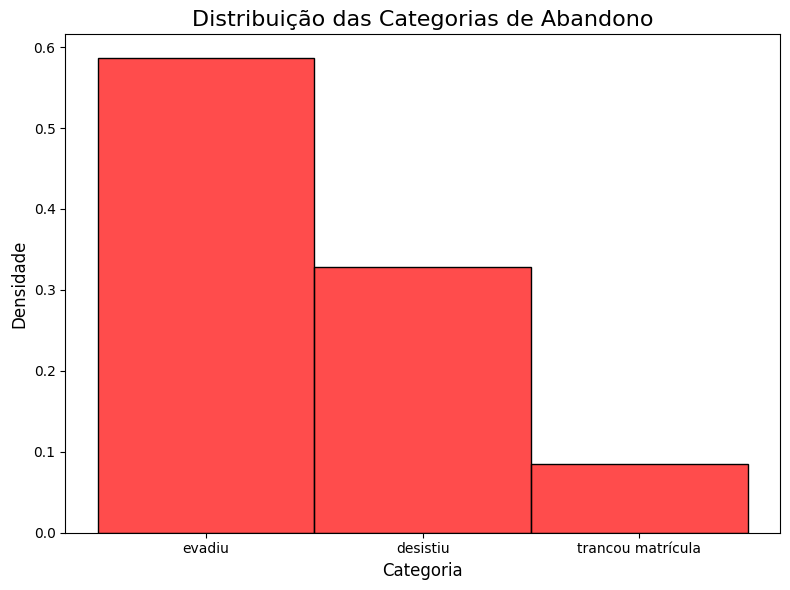

In [ ]:
# 1. Primeiro, filtramos o DataFrame para pegar APENAS os alunos que estão na lista de abandono
# Supondo que seu dataframe principal se chame 'dados'
dados_apenas_abandono = dados[dados[coluna_status].isin(abandono_list)]

# 2. Agora plotamos usando esse dataframe filtrado
plt.figure(figsize=(8, 6))

# Note: passamos o dataframe no 'data' e o nome da coluna no 'x'
sns.histplot(data=dados_apenas_abandono, x=coluna_status, stat='density', color='red', alpha=0.7)

plt.title('Distribuição das Categorias de Abandono', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.tight_layout()
plt.show()

# Tratamento dos Dados





In [ ]:
# 1. Ver o total inicial
print(f"Total de linhas original: {len(dados)}")

# 2. Ver quantos dados estão faltando em CADA coluna
print("\n--- Quantidade de valores vazios (NaN) por coluna ---")
print(dados[features_X].isnull().sum())

Total de linhas original: 1977

--- Quantidade de valores vazios (NaN) por coluna ---
media_provas                   0
nota_final                     1
presence_percent               0
homework_percent               0
class_participation_percent    1
behavior_percent               0
nota__1                        0
nota__2                        0
dtype: int64


# Overview da Regressão

In [ ]:
# --- 2. Selecionar e Preparar o DataFrame ---
colunas_para_manter = features_X + [coluna_status]
dados_modelo = dados[colunas_para_manter].copy()

print(f"Total antes da limpeza: {len(dados_modelo)}")
dados_modelo = dados_modelo.dropna(subset=features_X)
print(f"Total após limpeza de vazios: {len(dados_modelo)}")

# --- 3. Criar a Variável Alvo (Y) ---
dados_modelo['y_abandono'] = dados_modelo[coluna_status].isin(abandono_list).astype(int)
dados_modelo = dados_modelo.drop(columns=[coluna_status])

# --- 5. Treinar o Modelo ---
X = dados_modelo[features_X]
y = dados_modelo['y_abandono']

# Dividir em Treino (80%) e Teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- AQUI ESTÁ A PROVA DOS NÚMEROS ---
print("-" * 30)
print(f"Total de alunos para TREINAR o robô: {len(X_train)} (80%)")
print(f"Total de alunos para TESTAR (Matriz): {len(X_test)} (20%)")
print("-" * 30)

# Treinar
model_abandono = LogisticRegression(solver='lbfgs', max_iter=1000)
model_abandono.fit(X_train, y_train)

# Resultados
y_pred = model_abandono.predict(X_test)

# ... (Aqui continua o código da sua Matriz de Confusão) ...

Total antes da limpeza: 1977
Total após limpeza de vazios: 1975
------------------------------
Total de alunos para TREINAR o robô: 1580 (80%)
Total de alunos para TESTAR (Matriz): 395 (20%)
------------------------------


O test_size=0.2 siginifica -  "Pegue 20% dos dados e guarde numa caixa separada chamada Teste".

Total de alunos: ~1975

Treino (80%): ~1580 alunos (O modelo usa estes para aprender).

Teste (20%): ~395 alunos (O modelo usa estes para gerar a matriz de confusão).

Seu modelo está usando todos os dados corretamente.

In [ ]:
# --- 2. Selecionar e Preparar o DataFrame ---

# Manter apenas as colunas que vamos usar
colunas_para_manter = features_X + [coluna_status]
dados_modelo = dados[colunas_para_manter].copy()

# Limpar linhas onde as features (X) são nulas, ANTES de modelar
dados_modelo = dados_modelo.dropna(subset=features_X)

# --- 3. Criar a Variável Alvo (Y) ---

# .isin() verifica se o valor da coluna está na 'abandono_list'
# .astype(int) converte True -> 1 (Abandono) e False -> 0 (Não Abandono)
dados_modelo['y_abandono'] = dados_modelo[coluna_status].isin(abandono_list).astype(int)

# Agora podemos remover a coluna de status original (texto)
dados_modelo = dados_modelo.drop(columns=[coluna_status])

# --- 5. Treinar o Modelo de Regressão Logística ---

# Definir X e y a partir do dataframe pronto
X = dados_modelo[features_X]
y = dados_modelo['y_abandono']

# Dividir em Treino e Teste
# 'stratify=y' é crucial se houver desequilíbrio (ex: poucos '1's)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar e treinar o modelo
model_abandono = LogisticRegression(solver='lbfgs', max_iter=1000)
model_abandono.fit(X_train, y_train)

# --- 6. Ver os Resultados ---
y_pred = model_abandono.predict(X_test)

print(f"\n--- Resultados da Regressão para ABANDONO ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['0: Não Abandono', '1: Abandono']))

# --- 7. Ver o Impacto de cada Variável (Coeficientes) ---
print("\nImpacto de cada variável (Coeficientes):")
coefs = pd.Series(model_abandono.coef_[0], index=features_X)
print(coefs.sort_values(ascending=False))


--- Resultados da Regressão para ABANDONO ---
Acurácia: 0.92

Relatório de Classificação:
                 precision    recall  f1-score   support

0: Não Abandono       0.96      0.96      0.96       336
    1: Abandono       0.75      0.75      0.75        59

       accuracy                           0.92       395
      macro avg       0.85      0.85      0.85       395
   weighted avg       0.92      0.92      0.92       395


Impacto de cada variável (Coeficientes):
behavior_percent               0.354432
homework_percent               0.351843
nota__1                        0.267705
class_participation_percent    0.126354
media_provas                  -0.061109
nota__2                       -0.601014
presence_percent              -1.368676
nota_final                    -1.746343
dtype: float64


In [ ]:
dados_modelo

,media_provas,nota_final,presence_percent,homework_percent,class_participation_percent,behavior_percent,nota__1,nota__2,y_abandono
0,5.290119,0.596702,0.965921,1.045456,1.147193,0.225325,4.428641,-0.210178,0
1,-0.179851,0.809174,0.425736,1.045456,0.536042,0.225325,4.865063,-0.209688,0
2,-0.181219,0.288576,0.713835,0.515048,1.147193,0.225325,-0.239521,-0.210373,0
3,-0.179877,0.842574,0.425736,1.045456,0.536042,0.225325,-0.238364,-0.209388,0
4,-0.180906,0.400090,0.425736,0.780252,0.536042,0.225325,-0.239433,-0.210006,0
...,...,...,...,...,...,...,...,...,...
1972,-0.180054,0.565748,0.713835,0.780252,0.841617,0.225325,-0.238713,-0.209370,0
1973,-0.180229,0.322490,0.965921,-0.147961,0.383254,0.225325,-0.238473,-0.209223,0
1974,-0.179299,1.041265,0.965921,1.045456,0.994405,0.225325,-0.238015,-0.208758,0
1975,-0.180174,0.698034,0.713835,1.045456,0.841617,0.225325,-0.238452,-0.210031,0


# Correlação entre os agrupamento das Features Selecionadas

In [ ]:
# --- 5. Criar gráfico (Com tamanho ajustado) ---
fig = px.bar(
    x=top_5.index,
    y=top_5.values,
    labels={'x': 'Variáveis', 'y': 'Correlação Absoluta'},
    title='Top 5 Variáveis (Correlação Isolada)',
    color=top_5.values,
    color_continuous_scale='RdBu',
    text=top_5.values,
    width=800,  # <--- Largura menor
    height=600  # <--- Altura menor
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

In [ ]:
# --- 5. Gráfico (Com tamanho ajustado) ---
fig = px.bar(
    x=top_vars.index,
    y=top_vars.values,
    labels={'x': 'Variáveis', 'y': 'Coeficiente (Peso)'},
    title='Impacto Real no Modelo (Coeficientes)',
    color=top_vars.values,
    color_continuous_scale='RdBu',
    text=top_vars.values,
    width=800,  # <--- Largura menor
    height=600  # <--- Altura menor
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

Por que os resultados diferem?

Regressão logística considera todas as variáveis ao mesmo tempo e ajusta os coeficientes para minimizar erro de classificação.
Correlação ignora as outras variáveis e mede apenas relação direta.
Uma variável pode ter alta correlação com abandono, mas no modelo ter coeficiente baixo porque outras variáveis explicam melhor o abandono (multicolinearidade).

# Regressões Aplicadas

In [ ]:
# --- 6. Gráfico: Matriz de Confusão com Porcentagem ---
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Não Abandono (0)', 'Abandono (1)'], columns=['Predito 0', 'Predito 1'])

# Cálculo das porcentagens
total_amostras = cm.sum()

# Criando a matriz de texto formatada
# Exemplo de formato: "15<br>(10.5%)"
text_labels = [
    [f"{valor}<br>({(valor/total_amostras):.1%})" for valor in linha]
    for linha in cm
]

# 1. Criar o gráfico SEM o argumento 'text'
fig_cm = px.imshow(
    cm_df,
    color_continuous_scale='Blues',
    title='Matriz de Confusão - Regressão Logística'
)

# 2. Atualizar o gráfico inserindo o texto customizado
fig_cm.update_traces(
    text=text_labels,
    texttemplate="%{text}"  # Diz ao Plotly para usar exatamente o que está na variável 'text'
)

fig_cm.update_xaxes(title='Classe Predita')
fig_cm.update_yaxes(title='Classe Real')
fig_cm.show()

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# --- 1. Calcular as Métricas ---
# pos_label=1 garante que estamos calculando Precision/Recall focados no ABANDONO
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

# --- 2. Preparar o Texto do Título (Formatado) ---
# Usamos tags HTML (<br>, <span>) para criar uma segunda linha menor e cinza
titulo_formatado = (
    f"Matriz de Confusão - Regressão Logística<br>"
    f"<span style='font-size: 14px; color: #555;'>"
    f"Acurácia: <b>{acc:.1%}</b>  |  Precision (Abandono): <b>{prec:.1%}</b>  |  Recall (Abandono): <b>{recall:.1%}</b>"
    f"</span>"
)

# --- 3. Gerar a Matriz (Seu código original) ---
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Não Abandono (0)', 'Abandono (1)'], columns=['Predito 0', 'Predito 1'])

total_amostras = cm.sum()

text_labels = [
    [f"{valor}<br>({(valor/total_amostras):.1%})" for valor in linha]
    for linha in cm
]

# --- 4. Plotar com o Novo Título ---
fig_cm = px.imshow(
    cm_df,
    color_continuous_scale='Blues',
    title=titulo_formatado  # <--- Aqui entra o título com as métricas
)

fig_cm.update_traces(
    text=text_labels,
    texttemplate="%{text}"
)

fig_cm.update_xaxes(title='Classe Predita')
fig_cm.update_yaxes(title='Classe Real')

# Ajuste fino para centralizar o título se quiser
fig_cm.update_layout(title_x=0.5)

fig_cm.show()

Regressão Linear

In [ ]:
X = dados_modelo[['media_provas','nota_final','presence_percent','homework_percent',
                  'class_participation_percent','behavior_percent','nota__1','nota__2']]
y = dados_modelo['y_abandono']

model = LinearRegression()
model.fit(X, y)

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [ 0.00559596 -0.21303392 -0.17463617  0.06803675  0.02833533  0.02238458
  0.00145887 -0.00654615]
Intercepto: 0.1488607594936709


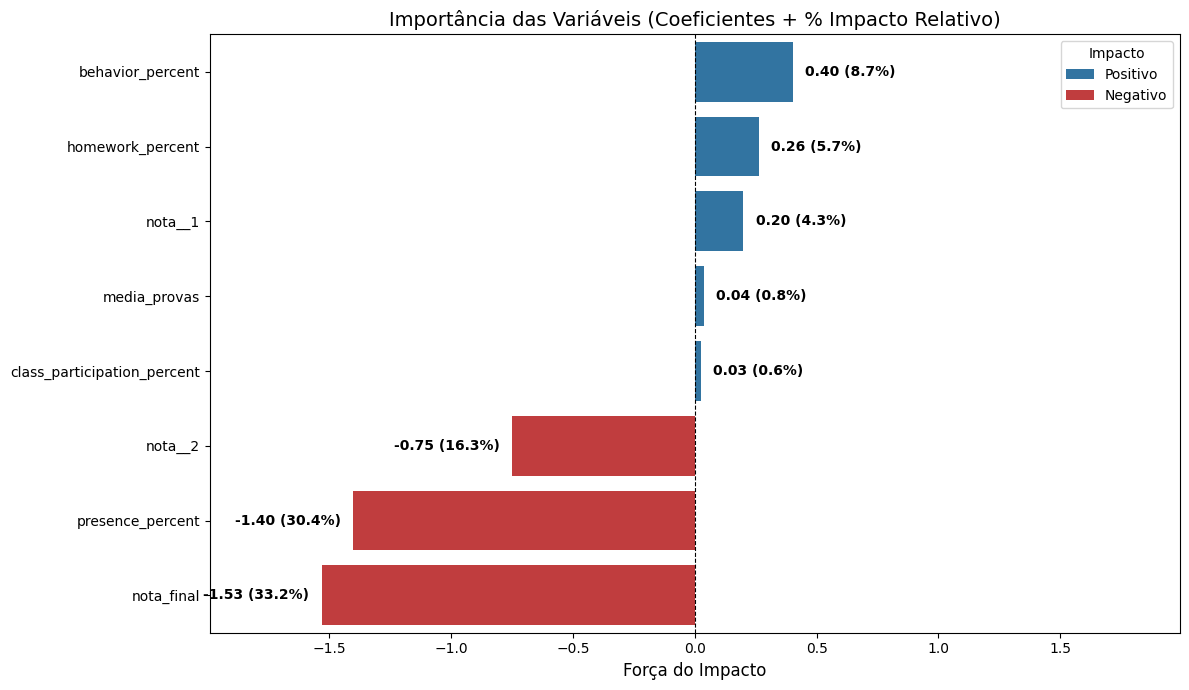

Colunas: 8 | Coeficientes: 8


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# --- 1. Garantir Sincronia e Treinamento ---
X_recente = dados_modelo[features_X]
y_recente = dados_modelo['y_abandono']

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_recente)

# Treinar
model_ajustado = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ajustado.fit(X_scaled, y_recente)

# --- 2. Preparar Dados ---
coeficientes = model_ajustado.coef_.flatten()

coef_df = pd.DataFrame({
    'Feature': features_X,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False)

# Definir Tipo (Positivo/Negativo)
coef_df['Tipo'] = ['Positivo' if x > 0 else 'Negativo' for x in coef_df['Coeficiente']]

# --- AQUI ESTÁ A MÁGICA: Calcular a Porcentagem de Impacto ---
# Soma absoluta para saber quanto cada um representa do todo
soma_total = np.abs(coef_df['Coeficiente']).sum()
coef_df['Pct'] = np.abs(coef_df['Coeficiente']) / soma_total

# --- 3. Plotar ---
plt.figure(figsize=(12, 7)) # Aumentei um pouco a largura

# Criamos o objeto 'ax' para poder desenhar os textos depois
ax = sns.barplot(
    x='Coeficiente',
    y='Feature',
    data=coef_df,
    hue='Tipo',
    palette={'Positivo': '#1f77b4', 'Negativo': '#d62728'},
    dodge=False
)

plt.title('Importância das Variáveis (Coeficientes + % Impacto Relativo)', fontsize=14)
plt.xlabel('Força do Impacto', fontsize=12)
plt.ylabel('') # Tirei o label Y para ficar mais limpo
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Impacto')

# --- 4. Adicionar os Números no Gráfico ---
# Iteramos sobre cada barra para escrever o texto
for i, (valor, pct) in enumerate(zip(coef_df['Coeficiente'], coef_df['Pct'])):

    # Formata o texto: Ex: "-1.75 (25.0%)"
    texto = f"{valor:.2f} ({pct:.1%})"

    # Lógica para posicionar o texto sem encavalar na barra
    # Se positivo, colocamos um pouco à direita. Se negativo, um pouco à esquerda.
    offset = 0.05 if valor >= 0 else -0.05
    alinhamento = 'left' if valor >= 0 else 'right'

    ax.text(
        x=valor + offset,   # Posição horizontal (fim da barra + espacinho)
        y=i,                # Posição vertical (linha da feature)
        s=texto,            # O texto escrito
        va='center',        # Centralizado verticalmente
        ha=alinhamento,     # Alinhado conforme o lado
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Aumentar as margens laterais para o texto caber
max_val = max(abs(coef_df['Coeficiente']))
plt.xlim(-max_val * 1.3, max_val * 1.3)

plt.tight_layout()
plt.show()

# Diagnóstico
print(f"Colunas: {len(features_X)} | Coeficientes: {len(coeficientes)}")

In [ ]:
# Criar a coluna de Odds Ratio
coef_df['Odds_Ratio'] = np.exp(coef_df['Coeficiente'])

# Calcular o percentual de impacto
def calcular_impacto(odds_ratio):
    if odds_ratio > 1:
        # Aumento
        return f"+{(odds_ratio - 1) * 100:.1f}%"
    else:
        # Redução
        return f"-{(1 - odds_ratio) * 100:.1f}%"

coef_df['Impacto_Real'] = coef_df['Odds_Ratio'].apply(calcular_impacto)

# Ver resultado
print(coef_df[['Feature', 'Coeficiente', 'Odds_Ratio', 'Impacto_Real']])

                       Feature  Coeficiente  Odds_Ratio Impacto_Real
5             behavior_percent     0.401816    1.494537       +49.5%
3             homework_percent     0.262920    1.300723       +30.1%
6                      nota__1     0.199720    1.221060       +22.1%
0                 media_provas     0.036031    1.036688        +3.7%
4  class_participation_percent     0.026480    1.026833        +2.7%
7                      nota__2    -0.751364    0.471723       -52.8%
2             presence_percent    -1.402843    0.245897       -75.4%
1                   nota_final    -1.531733    0.216161       -78.4%


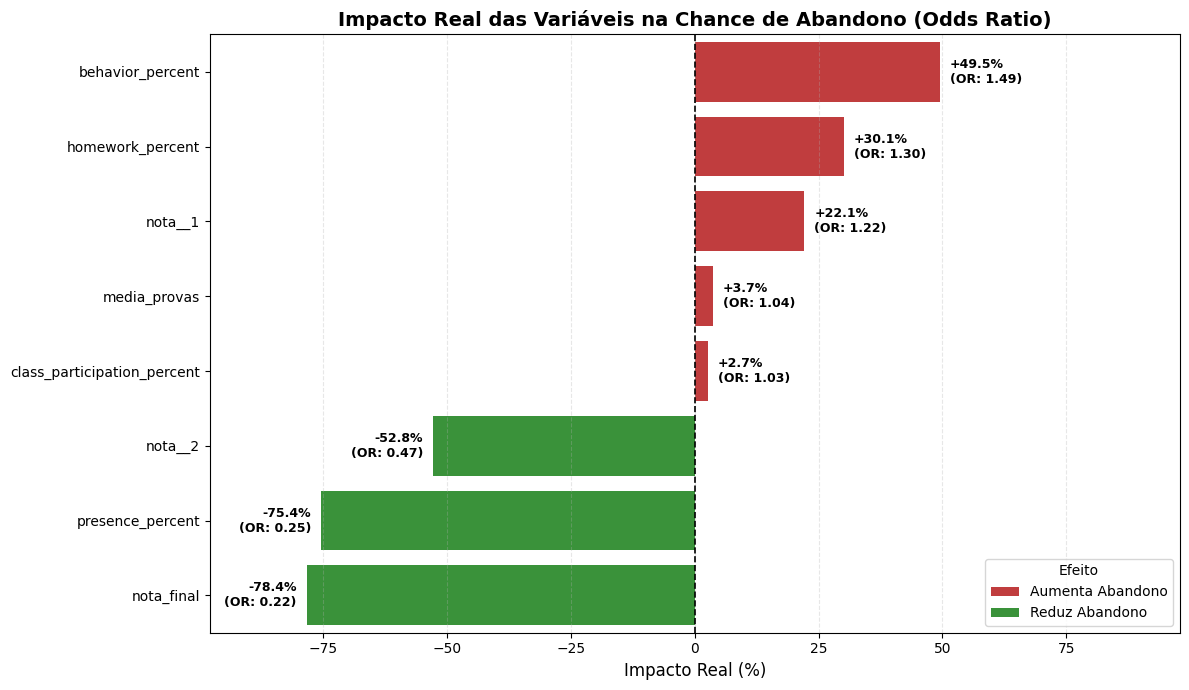


TABELA DE IMPACTO REAL DAS VARIÁVEIS
                    Feature  Coeficiente  Odds_Ratio  Impacto_Pct    Interpretação
           behavior_percent     0.401816    1.494537    49.453657 Aumenta em 49.5%
           homework_percent     0.262920    1.300723    30.072311 Aumenta em 30.1%
                    nota__1     0.199720    1.221060    22.106044 Aumenta em 22.1%
               media_provas     0.036031    1.036688     3.668839  Aumenta em 3.7%
class_participation_percent     0.026480    1.026833     2.683334  Aumenta em 2.7%
                    nota__2    -0.751364    0.471723   -52.827713   Reduz em 52.8%
           presence_percent    -1.402843    0.245897   -75.410311   Reduz em 75.4%
                 nota_final    -1.531733    0.216161   -78.383921   Reduz em 78.4%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# --- 1. Garantir Sincronia e Treinamento ---
X_recente = dados_modelo[features_X]
y_recente = dados_modelo['y_abandono']

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_recente)

# Treinar
model_ajustado = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ajustado.fit(X_scaled, y_recente)

# --- 2. Preparar Dados ---
coeficientes = model_ajustado.coef_.flatten()

coef_df = pd.DataFrame({
    'Feature': features_X,
    'Coeficiente': coeficientes
})

# Calcular Odds Ratio
coef_df['Odds_Ratio'] = np.exp(coef_df['Coeficiente'])

# Calcular Impacto Real em %
def calcular_impacto_pct(odds_ratio):
    if odds_ratio > 1:
        return (odds_ratio - 1) * 100  # Aumento
    else:
        return -(1 - odds_ratio) * 100  # Redução (negativo)

coef_df['Impacto_Pct'] = coef_df['Odds_Ratio'].apply(calcular_impacto_pct)

# Ordenar por impacto
coef_df = coef_df.sort_values(by='Impacto_Pct', ascending=False)

# Definir Tipo (Aumenta/Reduz Abandono)
coef_df['Tipo'] = ['Aumenta Abandono' if x > 0 else 'Reduz Abandono' for x in coef_df['Impacto_Pct']]

# --- 3. Plotar ---
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Impacto_Pct',
    y='Feature',
    data=coef_df,
    hue='Tipo',
    palette={'Aumenta Abandono': '#d62728', 'Reduz Abandono': '#2ca02c'},
    dodge=False
)

plt.title('Impacto Real das Variáveis na Chance de Abandono (Odds Ratio)', fontsize=14, fontweight='bold')
plt.xlabel('Impacto Real (%)', fontsize=12)
plt.ylabel('')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.2)
plt.legend(title='Efeito', loc='lower right')

# --- 4. Adicionar os Números no Gráfico ---
for i, (impacto, odds) in enumerate(zip(coef_df['Impacto_Pct'], coef_df['Odds_Ratio'])):

    # Formata o texto: Ex: "+49.0% (OR: 1.49)"
    sinal = "+" if impacto >= 0 else ""
    texto = f"{sinal}{impacto:.1f}%\n(OR: {odds:.2f})"

    # Posicionar o texto
    offset = 2 if impacto >= 0 else -2
    alinhamento = 'left' if impacto >= 0 else 'right'

    ax.text(
        x=impacto + offset,
        y=i,
        s=texto,
        va='center',
        ha=alinhamento,
        fontsize=9,
        color='black',
        fontweight='bold'
    )

# Ajustar limites para o texto caber
max_val = max(abs(coef_df['Impacto_Pct']))
plt.xlim(-max_val * 1.25, max_val * 1.25)

# Adicionar grid para facilitar leitura
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# --- 5. Tabela de Resultados ---
print("\n" + "="*70)
print("TABELA DE IMPACTO REAL DAS VARIÁVEIS")
print("="*70)
resultado = coef_df[['Feature', 'Coeficiente', 'Odds_Ratio', 'Impacto_Pct']].copy()
resultado['Interpretação'] = resultado.apply(
    lambda row: f"{'Aumenta' if row['Impacto_Pct'] > 0 else 'Reduz'} em {abs(row['Impacto_Pct']):.1f}%",
    axis=1
)
print(resultado.to_string(index=False))
print("="*70)

Acurácia geral: 93,67% → O modelo tem alta capacidade de classificação global.
Precisão (74,29%) → Quando o modelo prevê abandono, acerta em aproximadamente 74% dos casos.
Recall (88,14%) → O modelo identifica corretamente 88% dos alunos que realmente abandonaram, o que é excelente para reduzir falsos negativos.
F1-score (80,62%) → Bom equilíbrio entre precisão e recall.

Esses números indicam que o modelo é forte para detectar abandono, priorizando recall (o que é desejável para evitar que casos de evasão passem despercebidos).